In [1]:
import pandas as pd

In [2]:
url = 'https://raw.githubusercontent.com/alura-cursos/regressao_boosting/main/Dados/dados_automoveis.csv'

In [3]:
df = pd.read_csv(url)

In [4]:
df.head()

,Marca,Modelo,Ano,Tipo_combustivel,Potencia_motor,Cilindros_motor,Tipo_transmissao,Rodas_motrizes,Numero_portas,Tamanho,Estilo,Consumo_estrada_milhas,Consumo_cidade_milhas,Valor($)
0,GMC,Envoy XL,2005,gasolina comum,275.0,6.0,automatico,tracao traseira,4.0,grande,SUV 4 portas,18,13,29695
1,Volkswagen,Passat,2016,gasolina comum,170.0,4.0,automatico,tracao dianteira,4.0,medio,seda,38,25,30495
2,Honda,Odyssey,2016,gasolina comum,248.0,6.0,automatico,tracao dianteira,4.0,grande,minivan de passageiros,28,19,37650
3,Chevrolet,Cruze,2015,gasolina comum,138.0,4.0,manual,tracao dianteira,4.0,medio,seda,36,25,16170
4,Volvo,740,1991,gasolina comum,162.0,4.0,automatico,tracao traseira,4.0,medio,seda,20,17,2000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10918 entries, 0 to 10917
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Marca                   10918 non-null  object 
 1   Modelo                  10918 non-null  object 
 2   Ano                     10918 non-null  int64  
 3   Tipo_combustivel        10918 non-null  object 
 4   Potencia_motor          10862 non-null  float64
 5   Cilindros_motor         10888 non-null  float64
 6   Tipo_transmissao        10918 non-null  object 
 7   Rodas_motrizes          10918 non-null  object 
 8   Numero_portas           10916 non-null  float64
 9   Tamanho                 10918 non-null  object 
 10  Estilo                  10918 non-null  object 
 11  Consumo_estrada_milhas  10918 non-null  int64  
 12  Consumo_cidade_milhas   10918 non-null  int64  
 13  Valor($)                10918 non-null  int64  
dtypes: float64(3), int64(4), object(7)
mem

In [6]:
df.duplicated().sum()

np.int64(709)

In [7]:
dados_limpos = df.drop_duplicates()
dados_limpos.reset_index(drop=True, inplace=True)

In [8]:
dados_limpos.shape

(10209, 14)

In [9]:
df_final = dados_limpos.copy()

object_columns = df_final.select_dtypes(include='object').columns
df_final[object_columns] = df_final[object_columns].astype('category')

In [10]:
df_final.dtypes

,0
Marca,category
Modelo,category
Ano,int64
Tipo_combustivel,category
Potencia_motor,float64
Cilindros_motor,float64
Tipo_transmissao,category
Rodas_motrizes,category
Numero_portas,float64
Tamanho,category


In [11]:
X = df_final.drop(['Valor($)'], axis=1)
y = df_final['Valor($)']

In [12]:
X.head()

,Marca,Modelo,Ano,Tipo_combustivel,Potencia_motor,Cilindros_motor,Tipo_transmissao,Rodas_motrizes,Numero_portas,Tamanho,Estilo,Consumo_estrada_milhas,Consumo_cidade_milhas
0,GMC,Envoy XL,2005,gasolina comum,275.0,6.0,automatico,tracao traseira,4.0,grande,SUV 4 portas,18,13
1,Volkswagen,Passat,2016,gasolina comum,170.0,4.0,automatico,tracao dianteira,4.0,medio,seda,38,25
2,Honda,Odyssey,2016,gasolina comum,248.0,6.0,automatico,tracao dianteira,4.0,grande,minivan de passageiros,28,19
3,Chevrolet,Cruze,2015,gasolina comum,138.0,4.0,manual,tracao dianteira,4.0,medio,seda,36,25
4,Volvo,740,1991,gasolina comum,162.0,4.0,automatico,tracao traseira,4.0,medio,seda,20,17


In [13]:
y.head()

,Valor($)
0,29695
1,30495
2,37650
3,16170
4,2000


In [14]:
from sklearn.model_selection import train_test_split

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.25, random_state=4256)

In [15]:
import xgboost as xgb

In [16]:
xgb.__version__

'3.2.0'

In [17]:
modelo = xgb.XGBRegressor(objective='reg:squarederror', enable_categorical=True, n_estimators=100)
modelo.fit(X_treino, y_treino)

preds = modelo.predict(X_teste)

In [19]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_teste, preds)
print(f'MSE: {mse:.2f}')

MSE: 10073067.00


In [21]:
import numpy as np

rmse = np.sqrt(mse)
print(f'RMSE: {rmse:.2f}')

RMSE: 3173.81


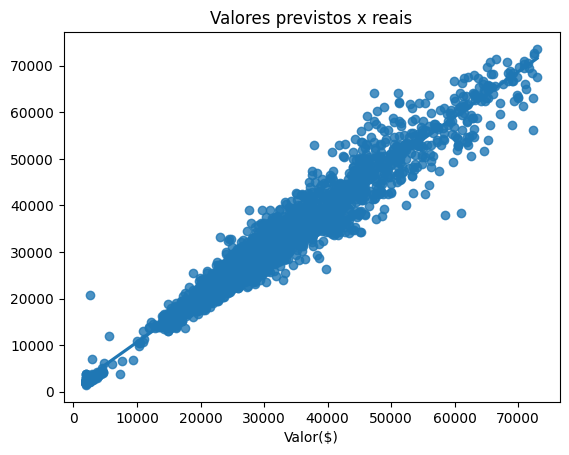

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.regplot(x=y_teste, y=preds)
plt.x_label = 'Valores reais'
plt.y_label = 'Valores previstos'
plt.title('Valores previstos x reais')
plt.show()

In [23]:
dtreino=xgb.DMatrix(X_treino, y_treino, enable_categorical=True)
dteste=xgb.DMatrix(X_teste, y_teste, enable_categorical=True)

In [25]:
params={'objective':'reg:squarederror'}

In [26]:
modelo=xgb.train(
    params=params,
    dtrain=dtreino,
    num_boost_round=100,
)

preds=modelo.predict(dteste)

In [28]:
mse = mean_squared_error(dteste.get_label(), preds)
rmse = np.sqrt(mse)
print(f'RMSE: {rmse:.2f}')

RMSE: 3173.81


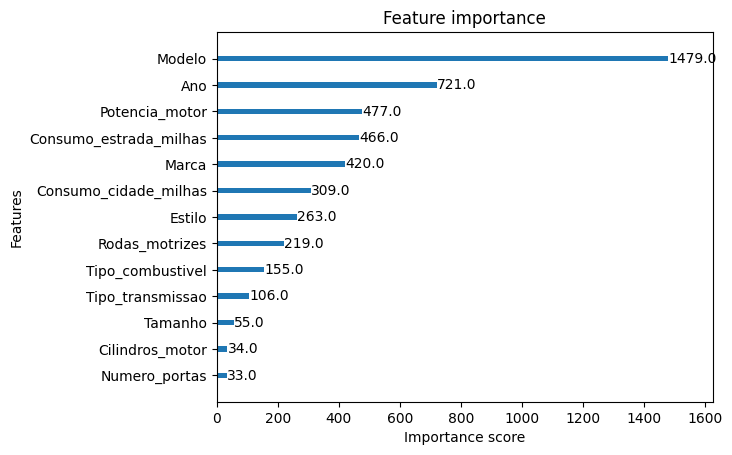

In [31]:
xgb.plot_importance(modelo)
plt.grid(False)
plt.show()